# Used Car Price Prediction

<font color="Green"> 3rd, 4th and 5th (End date: 12th of July,2020)  Day of my KaggleStreak </font>

So called Second hand's car have a huge market base.
Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The main reason for this huge market is that when you buy a New Car and sale it just another day without any default on it, the price of car reduces by 30%.

There are also many frauds in the market who not only sale wrong but also they could mislead to wrong price.

So, here I used this following dataset to Predict the price of any used car.

Do give <font color="Red"> UPVOTE </font>

**I WILL BE ADDING LINK OF DEPLOYED MODEL SOON IN COMMENT SECTION**
**If not done till Know**

In [118]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [119]:
train_data = pd.read_csv('C:/Users/krish/Downloads/train-data.csv')
test_data = pd.read_csv('C:/Users/krish/Downloads/test-data.csv')

In [120]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [121]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [122]:
# train_data.tail()

In [123]:
# train_data = train_data.iloc[:,1:]
# train_data.head()

In [124]:
# train_data.describe()

In [125]:
train_data.shape

(6019, 14)

In [126]:
# train_data['Kilometers_Driven'].value_counts()

In [127]:
# # Looking ate the unique values of Categorical Features
# print(train_data['Location'].unique())
# print(train_data['Fuel_Type'].unique())
# print(train_data['Transmission'].unique())
# print(train_data['Owner_Type'].unique())

# #Rest Feature are worked for Feature Engineering

In [128]:
# train_data.isnull().sum()

Let's Drop sum Rows which contains NULL values.

I ignored New_Price as there are many cell which contains NULL value in this column.

In [129]:
print("Shape of train data Before dropping any Row: ",train_data.shape)
train_data = train_data[train_data['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",train_data.shape)
train_data = train_data[train_data['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",train_data.shape)
train_data = train_data[train_data['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",train_data.shape)
train_data = train_data[train_data['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",train_data.shape)

Shape of train data Before dropping any Row:  (6019, 14)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 14)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 14)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 14)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 14)


So, in total I have 5975 Rows now to work forward. I droped 44 rows.

In [130]:
train_data = train_data.reset_index(drop=True)

Well after using *.notna()* we have many absent indexes (Eg: If row no 47 was droped then after 46 we have 48 index), so I reset the index and droping the present index.

# Feautre Engineering 🛠
There are many different data which could be extarcted from present. And, that's where Feature Engineering comes.

In [131]:
i=0
train_data['Power'][i].split()[0]

'58.16'

In [132]:
for i in range(train_data.shape[0]):
    train_data.at[i, 'Company'] = train_data['Name'][i].split()[0]
    train_data.at[i, 'Mileage(km/kg)'] = train_data['Mileage'][i].split()[0]
    train_data.at[i, 'Engine(CC)'] = train_data['Engine'][i].split()[0]
    train_data.at[i, 'Power(bhp)'] = train_data['Power'][i].split()[0]

In [133]:
train_data['Mileage(km/kg)'] = train_data['Mileage(km/kg)'].astype(float)
train_data['Engine(CC)'] = train_data['Engine(CC)'].astype(float)

At this point when I tried to change **Power(bhp)** to float an error occured (Can't convert str to float : null).
So, I started investigating. And found some cell where having values: 'null bhp'

In [134]:
train_data['Power'][76]

'null bhp'

Then I found the indexes of these values and removed them.

In [135]:
x = 'n'
count = 0
position = []
for i in range(train_data.shape[0]):
    if train_data['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [136]:
train_data = train_data.drop(train_data.index[position])
train_data = train_data.reset_index(drop=True)

Now the new shape of training data is:

In [137]:
train_data.shape

(5872, 18)

In [138]:
train_data['Power(bhp)'] = train_data['Power(bhp)'].astype(float)

In [139]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80


In [140]:
# train_data.New_Price

In [141]:
for i in range(train_data.shape[0]):
    if pd.isnull(train_data.loc[i,'New_Price']) == False:
        train_data.at[i,'New_car_Price'] = train_data['New_Price'][i].split()[0]

In [142]:
train_data['New_car_Price'] = train_data['New_car_Price'].astype(float)

Now,

Let's delete all useless featiures.

In [143]:
train_data.drop(["Name"],axis=1,inplace=True)
train_data.drop(["Mileage"],axis=1,inplace=True)
train_data.drop(["Engine"],axis=1,inplace=True)
train_data.drop(["Power"],axis=1,inplace=True)
train_data.drop(["New_Price"],axis=1,inplace=True)

# Data Visualization
### Let's Plot some
Data visualization is the best way to find out how a data looks like

In [144]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5872 non-null   int64  
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Seats              5872 non-null   float64
 8   Price              5872 non-null   float64
 9   Company            5872 non-null   object 
 10  Mileage(km/kg)     5872 non-null   float64
 11  Engine(CC)         5872 non-null   float64
 12  Power(bhp)         5872 non-null   float64
 13  New_car_Price      823 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 642.4+ KB


In [145]:
train_data['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

### Price

First let's have a look over our target column

(0.0, 160.0)

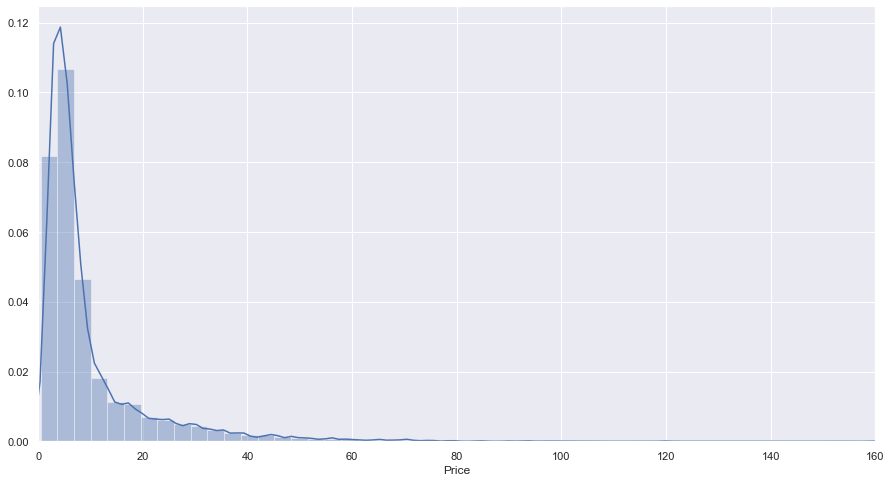

In [146]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(train_data['Price'])
plt.xlim([0,160])

### Fuel Type

In [147]:
train_data['Fuel_Type'].describe()

count       5872
unique         4
top       Diesel
freq        3152
Name: Fuel_Type, dtype: object

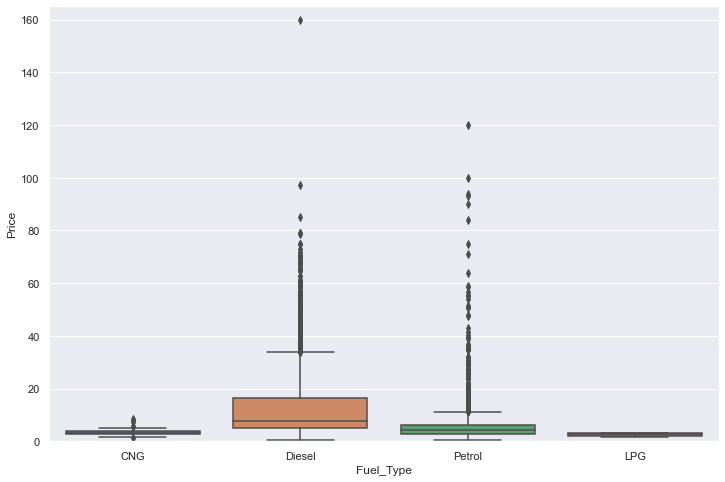

In [148]:
var = 'Fuel_Type'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);

As, we thought diseal car would cost followed Petrol.

In [ ]:
var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='Price', data = train_data)

### Year

In [ ]:
var = 'Year'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

Clearly, it's a strong tendency.

Price of Newest is high compared to old models.

### Owner Type

In [ ]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = train_data) 

### Company

In [ ]:
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=train_data);
plt.xticks(rotation=90);

Cleary **Maruti** is most comman brand followed by **Hyundai**

# Working with Categorical Data

As for now we have left with only 5 categorical features:
1. Location
2. Fuel_Type
3. Transmission
4. Owner_Type
5. Company

For hadeling categorical data. We modtly use these 2 path:
1. OneHotEncoder
2. LabelEncoder

Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.

So, for each Features we will use plots to find out what to be used there.

### Working for Location

In [150]:
var = 'Location'
train_data[var].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

From above values, we could judge that Mubmai has most number of cars to be sold followed by others.

In [ ]:
# Plot Location vs Price
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

We will be using One-hot-encoding here

In [151]:
Location = train_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


### Working for Fuel_Type

In [152]:
var = 'Fuel_Type'
train_data[var].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

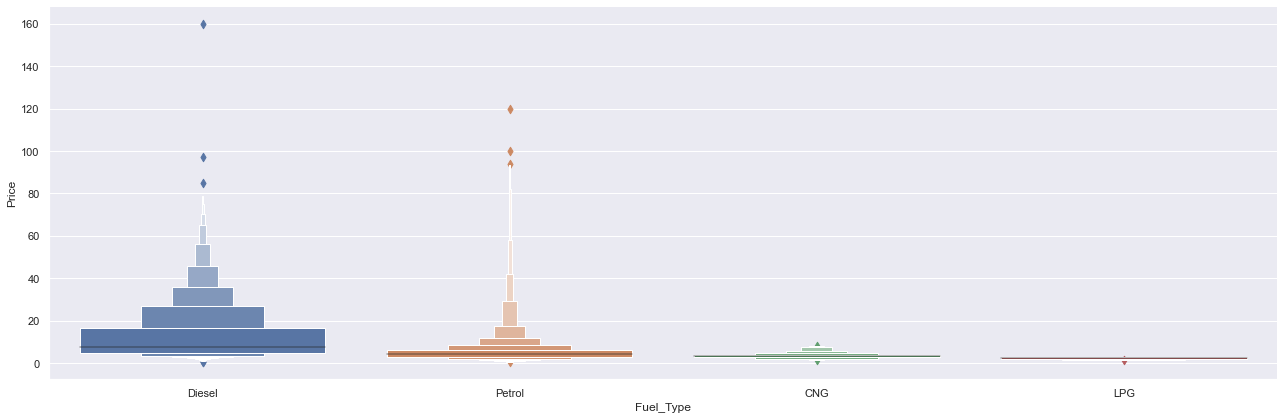

In [101]:
# Plot Fuel_Type vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Again we will be using One-hot-encoding

In [153]:
Fuel_t = train_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


### Working with Transmission

In [154]:
var = 'Transmission'
train_data[var].value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

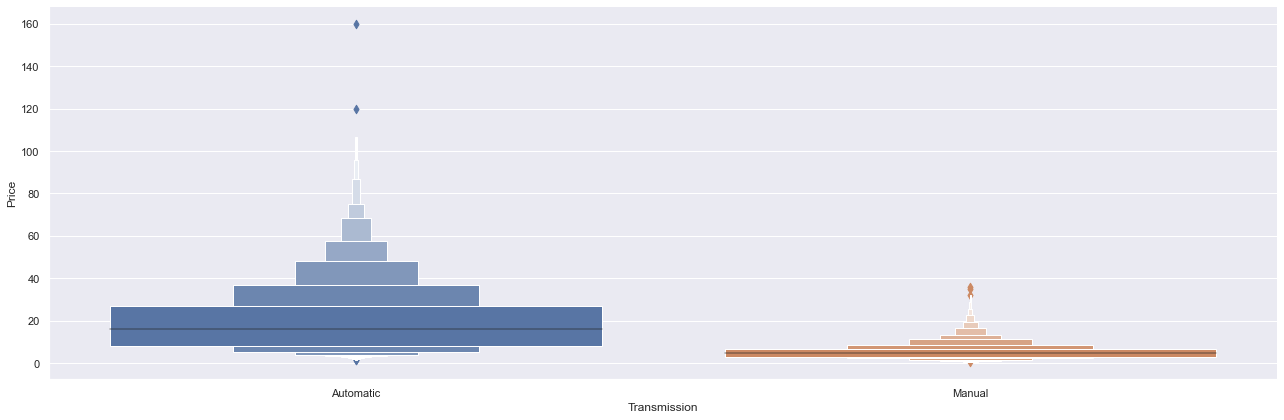

In [155]:
# Plot Transmission vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

No, order so One-hot-encoding

In [156]:
Transmission = train_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


### Working with Owner_Type

In [157]:
var = 'Owner_Type'
train_data[var].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

As Owner_Type column has ordered data so we will be using **Label Encoding** 
**Finally**

In [158]:
train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train_data.head()

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


### Working with Company

In [159]:
var = 'Company'
train_data[var].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Lamborghini         1
Bentley             1
Isuzu               1
Name: Company, dtype: int64

In [ ]:
# Plot Company vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

A lot of variation so let's drop them

In [160]:
train_data.drop(["Company"],axis=1,inplace=True)

In [161]:
final_train= pd.concat([train_data,Location,Fuel_t,Transmission],axis=1)
final_train.head()

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,26.60,...,0,0,0,0,1,0,0,0,0,1
1,1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,...,0,0,0,0,0,1,1,0,0,1
2,2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.20,...,0,0,0,0,0,0,0,0,1,1
3,3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,...,0,0,0,0,0,0,1,0,0,1
4,4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.20,...,0,0,0,0,0,0,1,0,0,0


In [162]:
final_train.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_train.head()

,Unnamed: 0,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,...,0,0,0,0,1,0,0,0,0,1
1,1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,0,...,0,0,0,0,0,1,1,0,0,1
2,2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,...,0,0,0,0,0,0,0,0,1,1
3,3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,0,...,0,0,0,0,0,0,1,0,0,1
4,4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,0,...,0,0,0,0,0,0,1,0,0,0


We are Done with Training data, so now work on Test Data

# Prepare Test Data

In [163]:
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


We will have to prepare this test data with performing all the steps agaon for test data

In [164]:
test_data = test_data.iloc[:,1:]

print("Shape of test data Before dropping any Row: ",train_data.shape)
test_data = test_data[test_data['Mileage'].notna()]
print("Shape of test data After dropping Rows with NULL values in Mileage: ",test_data.shape)
test_data = test_data[test_data['Engine'].notna()]
print("Shape of test data After dropping Rows with NULL values in Engine : ",test_data.shape)
test_data = test_data[test_data['Power'].notna()]
print("Shape of test data After dropping Rows with NULL values in Power  : ",test_data.shape)
test_data = test_data[test_data['Seats'].notna()]
print("Shape of test data After dropping Rows with NULL values in Seats  : ",test_data.shape)
print('Droping null done')

test_data = test_data.reset_index(drop=True)
print('Index reset done')

for i in range(test_data.shape[0]):
    test_data.at[i, 'Mileage(km/kg)'] = test_data['Mileage'][i].split()[0]
    test_data.at[i, 'Engine(CC)'] = test_data['Engine'][i].split()[0]
    test_data.at[i, 'Power(bhp)'] = test_data['Power'][i].split()[0]
print('Split Done') 

test_data['Mileage(km/kg)'] = test_data['Mileage(km/kg)'].astype(float)
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)
print('casting 1 Done') 

position = []
for i in range(test_data.shape[0]):
    if test_data['Power(bhp)'][i]=='null':
        position.append(i)
        
test_data = test_data.drop(test_data.index[position])
test_data = test_data.reset_index(drop=True) 

test_data['Power(bhp)'] = test_data['Power(bhp)'].astype(float)
print('casting 2 Done') 

for i in range(test_data.shape[0]):
    if pd.isnull(test_data.loc[i,'New_Price']) == False:
        test_data.at[i,'New_car_Price'] = test_data['New_Price'][i].split()[0]

test_data['New_car_Price'] = test_data['New_car_Price'].astype(float)

test_data.drop(["Name"],axis=1,inplace=True)
test_data.drop(["Mileage"],axis=1,inplace=True)
test_data.drop(["Engine"],axis=1,inplace=True)
test_data.drop(["Power"],axis=1,inplace=True)
test_data.drop(["New_Price"],axis=1,inplace=True)

var = 'Location'
Location = test_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

var = 'Fuel_Type'
Fuel_t = test_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

var = 'Transmission'
Transmission = test_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

final_test= pd.concat([test_data,Location,Fuel_t,Transmission],axis=1)
final_test.head()

final_test.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_test.head()

print("Final Test Size: ",final_test.shape)


Shape of test data Before dropping any Row:  (5872, 13)
Shape of test data After dropping Rows with NULL values in Mileage:  (1234, 12)
Shape of test data After dropping Rows with NULL values in Engine :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Power  :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Seats  :  (1223, 12)
Droping null done
Index reset done
Split Done
casting 1 Done
casting 2 Done
Final Test Size:  (1201, 21)


In [165]:
final_test.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,40929,1,4.0,32.26,998.0,58.20,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2013,54493,2,5.0,24.70,796.0,47.30,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,2017,34000,1,7.0,13.68,2393.0,147.80,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,2014,29000,1,5.0,18.50,1197.0,82.85,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,2016,85609,2,7.0,16.00,2179.0,140.00,0,0,1,...,0,0,0,0,0,0,1,0,0,1


# Final Features Selection

As our train and test data are ready so now we have to only look for features on which we have to work.

In [171]:
final_train.columns

Index(['Unnamed: 0', 'Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Price', 'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

In [172]:
X = final_train.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape

(5872, 21)

In [173]:
y = final_train.loc[:,['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


In [174]:
# train_data

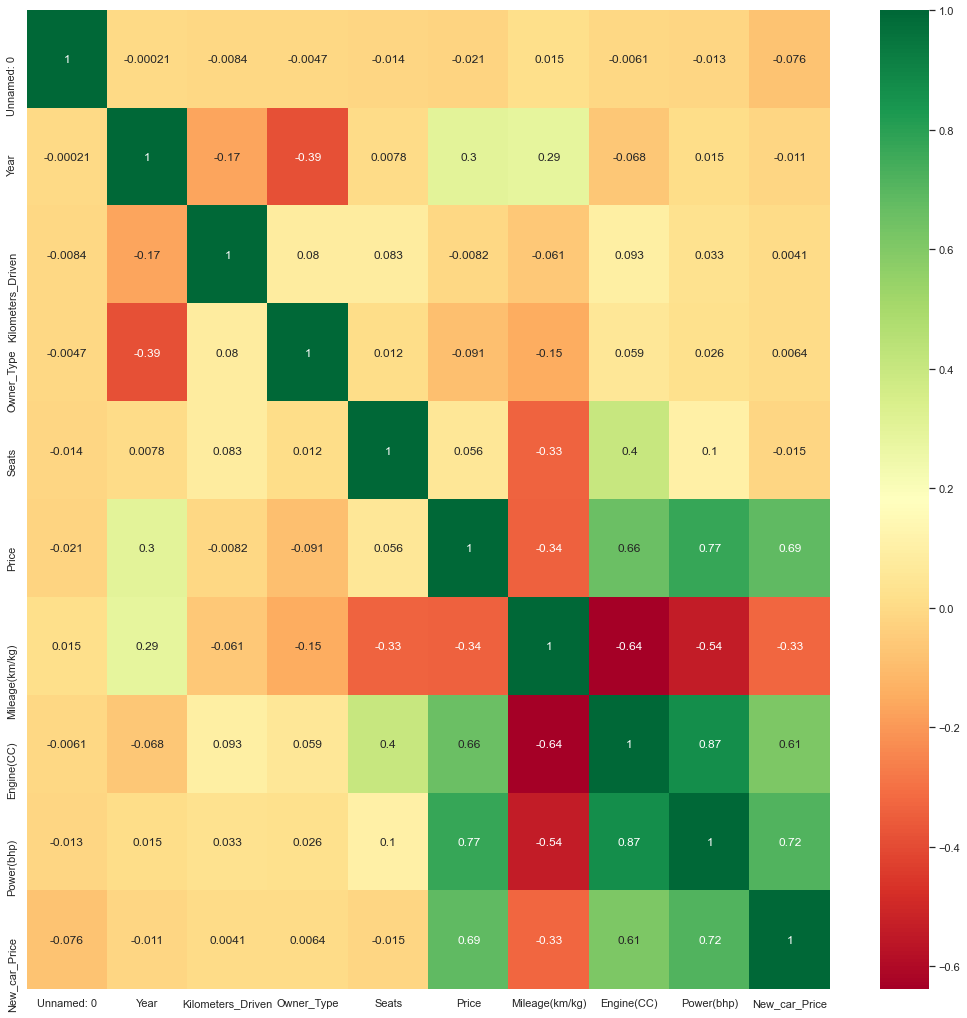

In [175]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

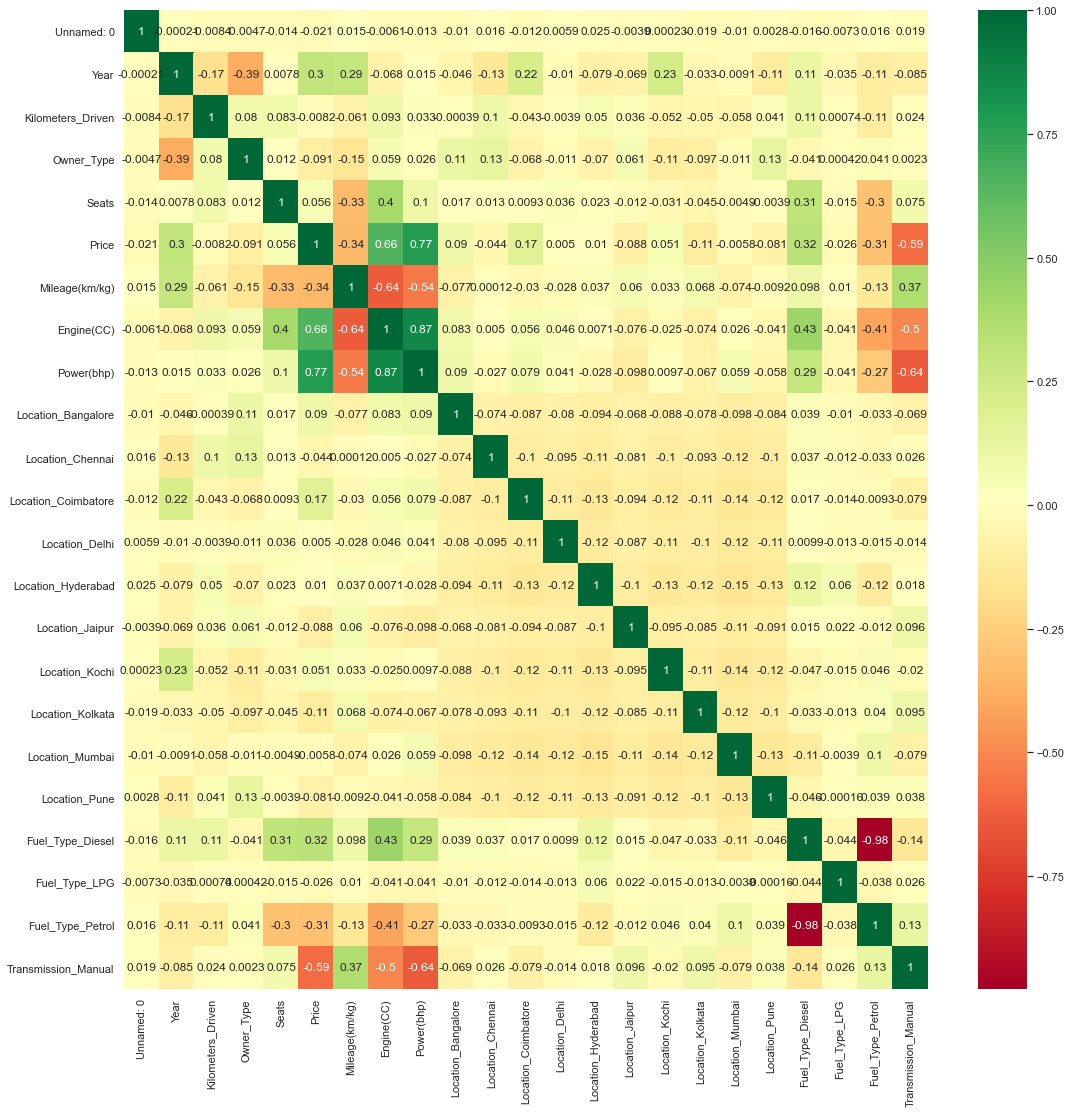

In [176]:
plt.figure(figsize=(18,18))
sns.heatmap(final_train.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [186]:
abs(final_train.corr())['Price'].sort_values(ascending=False)

Price                  1.000000
Power(bhp)             0.772843
Engine(CC)             0.658047
Transmission_Manual    0.585623
Mileage(km/kg)         0.341652
Fuel_Type_Diesel       0.321035
Fuel_Type_Petrol       0.309363
Year                   0.299475
Location_Coimbatore    0.170479
Location_Kolkata       0.107188
Owner_Type             0.091098
Location_Bangalore     0.089878
Location_Jaipur        0.088486
Location_Pune          0.080506
Seats                  0.055547
Location_Kochi         0.050992
Location_Chennai       0.043814
Fuel_Type_LPG          0.026132
Unnamed: 0             0.021191
Location_Hyderabad     0.010183
Kilometers_Driven      0.008249
Location_Mumbai        0.005800
Location_Delhi         0.004978
Name: Price, dtype: float64

In [187]:
X1 = final_train.loc[:,['Year',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Coimbatore',
       'Location_Delhi','Location_Kolkata','Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Transmission_Manual']]

In [177]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

<ipython-input-177-914d803b91a8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X,y)


ExtraTreesRegressor()

In [181]:
feat_importances.sort_values(ascending=False)

Power(bhp)             2.660636e-01
Transmission_Manual    2.642196e-01
Year                   1.578149e-01
Engine(CC)             1.158231e-01
Fuel_Type_Diesel       5.336371e-02
Seats                  3.391951e-02
Kilometers_Driven      2.638032e-02
Mileage(km/kg)         2.404319e-02
Location_Hyderabad     1.234259e-02
Location_Coimbatore    9.582338e-03
Fuel_Type_Petrol       6.023086e-03
Owner_Type             5.542785e-03
Location_Bangalore     5.248346e-03
Location_Kochi         5.039949e-03
Location_Delhi         3.912340e-03
Location_Mumbai        3.464017e-03
Location_Kolkata       2.884940e-03
Location_Chennai       2.240055e-03
Location_Pune          1.289626e-03
Location_Jaipur        8.011138e-04
Fuel_Type_LPG          7.749287e-07
dtype: float64

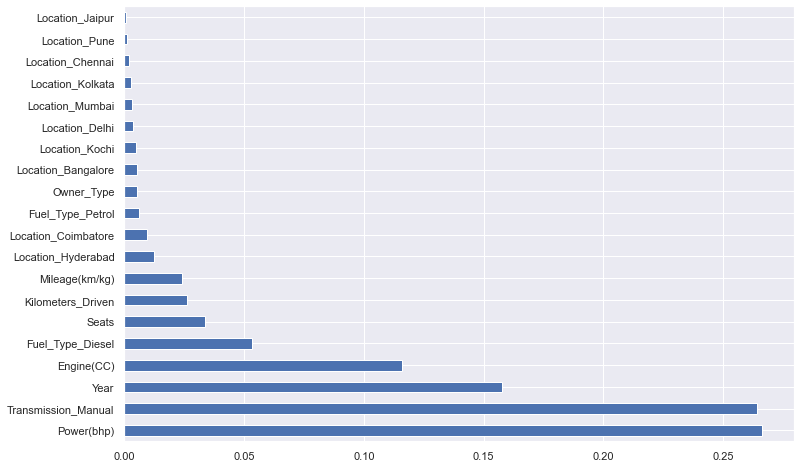

In [179]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Build it (Model)

First we are spliting the data to train and test for the model

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 25)

In [189]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4697, 10), (1175, 10), (4697, 1), (1175, 1))

### First let me try Linear Regression

In [190]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.7002609500739096
Accuracy on Testing set:  0.6936937150777069


#### Not a good accuracy so, let's try something more better.

### Now I am using Random Forest Regressor (obviously for better accuracy)

In [191]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

<ipython-input-191-d4d870abb6b4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Accuracy on Traing set:  0.977349118114347
Accuracy on Testing set:  0.9073531089348629


💥💥💥💥 **Oh Yeah!!!!**

That's a **Great Accuracy**

In [192]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  1.5205697570496886
Mean Squared  Error      :  10.857328043601857
Root Mean Squared  Error :  3.2950459850511735
R Squared Error          :  0.9073531089348629


 So, Finally this NoteBook End here 🤵🏻
 
 One could go even further by Hyperparameter tuning. But, for now I left it  over you all
 
 Before going a humble request if you liked the notebook the 
 <font color="Red">Please Upvote ( It motivates me ) </font>
 
 And Stay Tuned... 
 **I WILL BE ADDING LINK OF DEPLOYED MODEL SOON IN COMMENT SECTION**
 **If not done till Know**
 
 Till then Happy Coding
 